In [20]:
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("gapminder")
library(dplyr)
library(ggplot2)
library(gapminder)

In [2]:
head(gapminder, 3)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007


### Operador tuberia + verbo filter

In [3]:
gapminder %>%
  filter(country == "China", year == 1957) 

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
China,Asia,1957,50.54896,637408000,575.987


### Verbo arrange (ordenar)

In [4]:
gapminder_sorted_asc = gapminder %>%
  arrange(lifeExp)

In [5]:
head(gapminder_sorted_asc, 3)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Rwanda,Africa,1992,23.599,7290203,737.0686
Afghanistan,Asia,1952,28.801,8425333,779.4453
Gambia,Africa,1952,30.000,284320,485.2307


In [6]:
gapminder_sorted_desc = gapminder %>%
  arrange(desc(lifeExp))

In [7]:
gapminder_1957_sorted_desc = gapminder %>%
  filter(year == 1957) %>%
  arrange(desc(pop))

### Verbo mutate (manipular columnas)

In [8]:
gapminder_new = gapminder %>%
  mutate(annualLifeExp = 12 * lifeExp)

In [9]:
head(gapminder_new, 3)

country,continent,year,lifeExp,pop,gdpPercap,annualLifeExp
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453,345.612
Afghanistan,Asia,1957,30.332,9240934,820.8530,363.984
Afghanistan,Asia,1962,31.997,10267083,853.1007,383.964


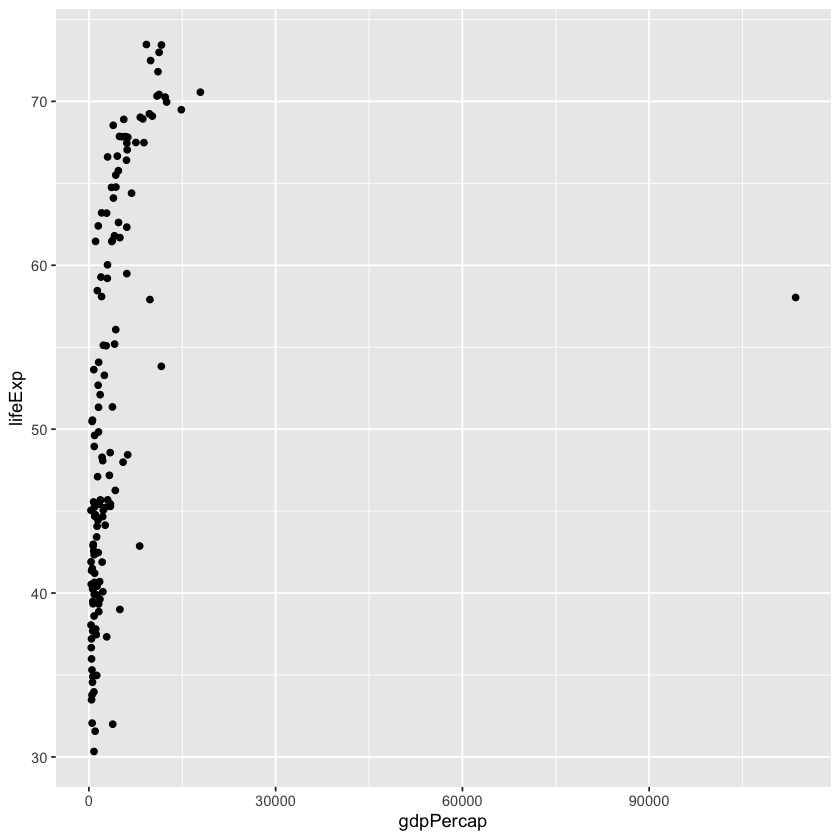

In [10]:
ggplot(gapminder_1957_sorted_desc, aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

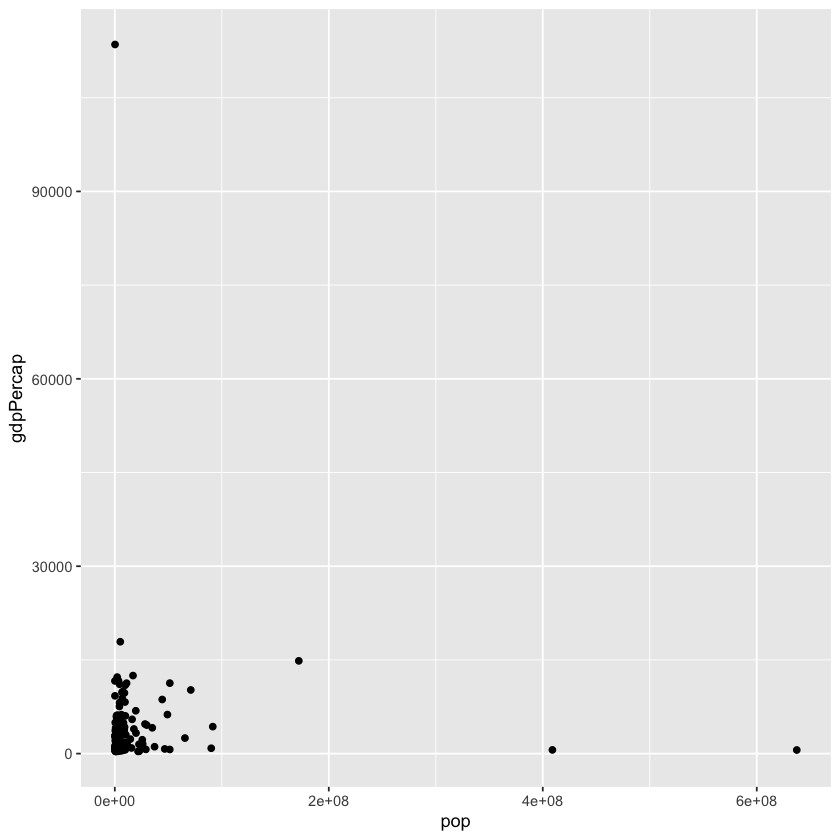

In [11]:
ggplot(gapminder_1957_sorted_desc, aes(x = pop, y = gdpPercap)) +
  geom_point()

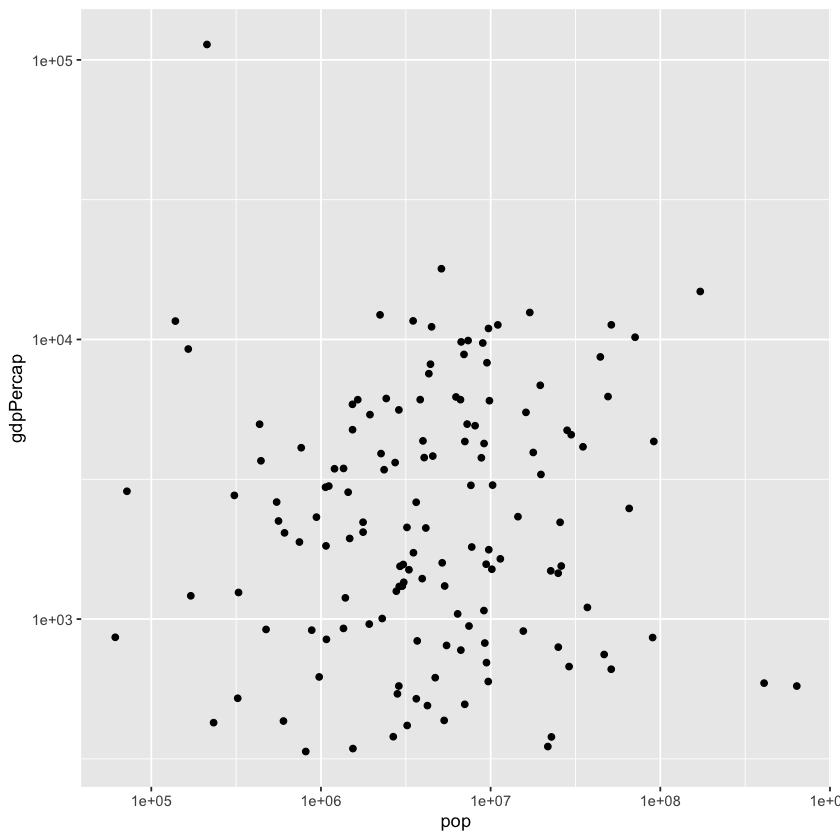

In [12]:
ggplot(gapminder_1957_sorted_desc, aes(x = pop, y = gdpPercap)) +
  geom_point() + 
  scale_x_log10() +
  scale_y_log10()

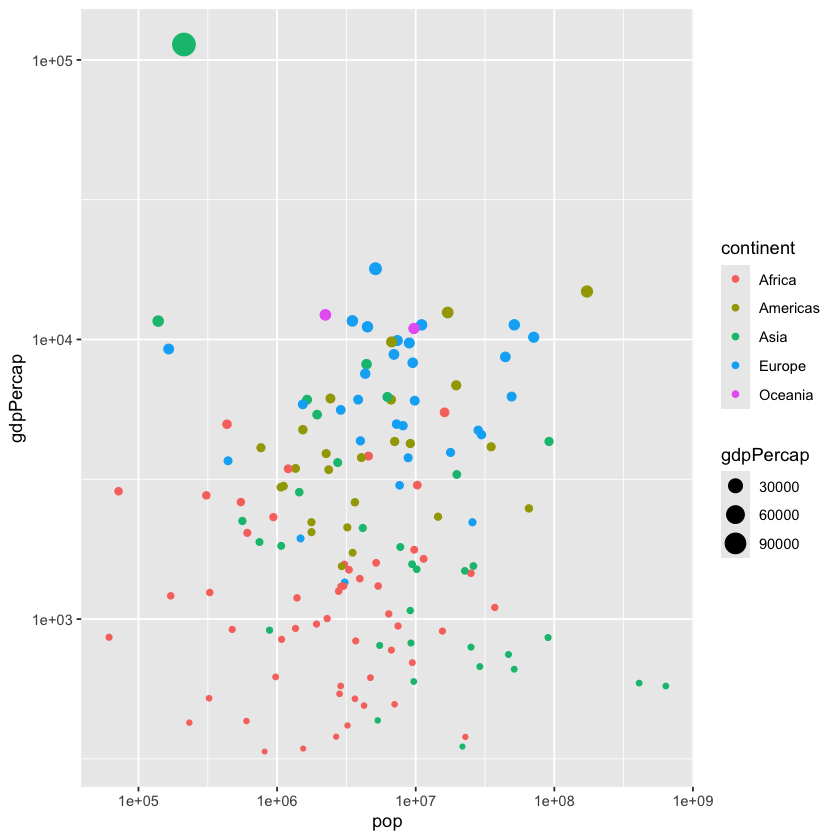

In [13]:
ggplot(
    gapminder_1957_sorted_desc,
    aes(x = pop, y = gdpPercap, color = continent, size = gdpPercap)
) +
  geom_point() + 
  scale_x_log10() +
  scale_y_log10()

### Verbo Summarize

In [14]:
gapminder %>%
  summarize(medianLifeExp = median(lifeExp))

medianLifeExp
<dbl>
60.7125


In [15]:
gapminder %>%
  filter(year == 1957) %>%
  summarize(medianLifeExp = median(lifeExp))

medianLifeExp
<dbl>
48.3605


In [16]:
gapminder %>%
  filter(year == 1957) %>%
  summarize(
      medianLifeExp = median(lifeExp),
      maxGdpPercap = max(gdpPercap)
  )

medianLifeExp,maxGdpPercap
<dbl>,<dbl>
48.3605,113523.1


### Verbo Group By

In [17]:
gapminder %>%
  group_by(year) %>%
  summarize(
      medianLifeExp = median(lifeExp),
      maxGdpPercap = max(gdpPercap)
  )

year,medianLifeExp,maxGdpPercap
<int>,<dbl>,<dbl>
1952,45.1355,108382.35
1957,48.3605,113523.13
1962,50.8810,95458.11
1967,53.8250,80894.88
1972,56.5300,109347.87
1977,59.6720,59265.48
1982,62.4415,33693.18
1987,65.8340,31540.97
1992,67.7030,34932.92


### Verbo Count

In [18]:
countries <- readRDS("data/counties.rds")

In [21]:
countries %>% 
    count(region, sort = TRUE)

region,n
<chr>,<int>
South,1420
North Central,1054
West,447
Northeast,217


In [27]:
countries %>% 
    count(state, wt = citizens) %>%
    head(3)

state,n
<chr>,<dbl>
Alabama,3620994
Alaska,519266
Arizona,4526594


In [29]:
countries %>% 
    mutate(population_walk = population * walk / 1000) %>%
    count(state, wt = population_walk, sort = TRUE) %>%
    head(3)

state,n
<chr>,<dbl>
New York,123793.82
California,101796.37
Pennsylvania,50539.72


### Verbo slice_min & slice_max

In [36]:
countries %>% 
    group_by(region) %>%
    slice_max(
        walk, n = 2
    ) %>%
    select(region, state, walk, population, income)

region,state,walk,population,income
<chr>,<chr>,<dbl>,<dbl>,<dbl>
North Central,North Dakota,17.5,2759,42277
North Central,Nebraska,16.6,1249,41215
North Central,North Dakota,16.6,969,70469
Northeast,New York,20.7,1629507,72871
Northeast,New York,14.6,103855,52624
South,Virginia,31.7,7071,34017
South,Georgia,24.5,6489,25513
West,Alaska,71.2,3304,61518
West,Alaska,46.9,7732,63648


### Verbo ungroup

In [38]:
countries %>%
    select(state, metro, population) %>%
    group_by(state, metro) %>%
    summarize(
        total_population = sum(population, na.rm = TRUE)
    ) %>%
    slice_max(total_population, n = 1) %>%
    ungroup() %>%
    count(metro)

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


metro,n
<chr>,<int>
Metro,44
Nonmetro,6


### Verbo contains, ends_with, starts_with

In [40]:
countries %>%
    select(state, population, contains("work")) %>%
    head(3)

state,population,work_at_home,private_work,public_work,family_work
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,55221,1.8,73.6,20.9,0.0
Alabama,195121,3.9,81.5,12.3,0.4
Alabama,26932,1.6,71.8,20.8,0.1


In [41]:
countries %>%
    select(state, population, ends_with("work")) %>%
    head(3)

state,population,private_work,public_work,family_work
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,55221,73.6,20.9,0.0
Alabama,195121,81.5,12.3,0.4
Alabama,26932,71.8,20.8,0.1


In [43]:
countries %>%
    select(state, population, starts_with("work")) %>%
    head(3)

state,population,work_at_home
<chr>,<dbl>,<dbl>
Alabama,55221,1.8
Alabama,195121,3.9
Alabama,26932,1.6


### Verbo rename

In [46]:
countries %>%
    select(state, population, starts_with("work")) %>%
    rename(state_new = state) %>%
    head(3)

state_new,population,work_at_home
<chr>,<dbl>,<dbl>
Alabama,55221,1.8
Alabama,195121,3.9
Alabama,26932,1.6


### Verbo relocate

In [57]:
countries %>%
    select(state, population, starts_with("work")) %>%
    relocate(state, .after = population) %>%
    head(3)

population,state,work_at_home
<dbl>,<chr>,<dbl>
55221,Alabama,1.8
195121,Alabama,3.9
26932,Alabama,1.6
